<a href="https://www.kaggle.com/code/snhippo/brain-tumor-classification-by-mobilenetv2?scriptVersionId=180019922" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<p style="background-color:#040C33;font-family:newtimeroman;color:#EFF0F7;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>
<ul style="list-style-type:Upper-roman">
    <li><a href="#1">IMPORT LIBRARIES</a></li>
    <li><a href="#2">Data IMPORT AND LOADING</a></li>
    <li><a href="#3">DATA PREPROCESSING</a></li>
    <ul><li><a href="#4">Training Dataset Preprocessing for Randomization</a></li></ul>
    <ul><li><a href="#4">Validation Dataset</a></li></ul>
    <ul><li><a href="#4">Testing Dataset</a></li></ul>
    <li><a href="#5"> EDA (EXPLORATORY DATA ANALYSIS)</a></li>
    <ul><li><a href="#5"> EDA (EXPLORATORY DATA ANALYSIS)</a></li></ul>
    <ul><li><a href="#5"> Image Visualization</a></li></ul>
    <ul><li><a href="#5"> Training Image Data</a></li></ul>
    <ul><li><a href="#5"> Testing Image Data</a></li></ul>
    <ul><li><a href="#5"> Validating Image Data</a></li></ul>
    <ul><li><a href="#5"> Validating Image Data</a></li></ul>
    <li><a href="#6">IMAGE DATA GENERATION FOR AUGMENTATION</a></li>
    <ul><li><a href="#6"> IMAGE Augmentation Sample</a></li></ul>
    <ul><li><a href="#6"> Data Augmentation and Generation</a></li></ul>
    <li><a href="#7">BUILD MODEL WITH VGG19</a></li>
    <li><a href="#8">MODEL SUMMARY</a></li>
    <li><a href="#9">PLOT MODEL</a></li>
    <li><a href="#10">MODEL COMPILE, TENSORBOARD, CHECKPOINT, REDUCE_LR</a></li>
    <li><a href="#11">MODEL FITTING AND PREDICTION</a></li>
    <li><a href="#12">MODEL EVALUATION</a></li>
    <li><a href="#13">ACCURACY, LEARNING RATE AND LOSS PLOT</a></li>
    <li><a href="#14">MODEL PREDICTION WITH VALIDATION(UNSEEN DATA)</a></li>
    <li><a href="#15">TESTING ACCURACY</a></li>
    <li><a href="#16">AUC and ROC CURVE</a></li>
    <li><a href="#17">CONFUSION MATRIX DISPLAY</a></li>
    <li><a href="#18">MISCLASSIFIED IMAGES</a></li>
    <li><a href="#19">MISCLASSIFIED IMAGE PATH</a></li>
    <li><a href="#20">SUMMARY</a></li>
  

### 👮 About MobileNetV2 Neural Network Model


MobileNetV2 is very similar to the original MobileNet, except that it uses inverted residual blocks with bottlenecking features. It has a drastically lower parameter count than the original MobileNet. MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.

# 💁 IMPORT LIBRARIES


In [182]:
#openCV
import cv2
#mathmetical operation
import numpy as np
#dataframe
import pandas as pd
#tensorflow for google framework of neural network
import tensorflow as tf
#another library for NN which runs on top of tensorflow for more effecient work and functionality
import keras
#directory access
import os
#data visualization 
#module provides tools and utilities for working with images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import backend as k
#sequential model
#enabling the creation and manipulation of Keras models
from tensorflow.keras.models import Model
#model import
from tensorflow.keras.applications import VGG19
#input details
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
#layer and regularization
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
#activation
from tensorflow.keras.optimizers import  SGD, Adam
#tensorboard
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint, LearningRateScheduler
#model flowchart
from tensorflow.keras.utils import plot_model
#ploting
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid
#misclassification display
import matplotlib.gridspec as gridspec
from PIL import Image

#Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#ROC AUC CURVE
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle
from sklearn.preprocessing import label_binarize #for categorical to binary conversion

#Warning
import warnings
from sklearn.exceptions import DataConversionWarning  # Import the specific warning

# Filter specific warnings
warnings.filterwarnings(action='ignore')




# 🌞 DATA IMPORT AND LOADING

`data_dir = ("../cnn/dataset/MRI Image Dataset for Brain Tumor/Training"):` Specifies the root directory containing the dataset. It likely indicates the base directory where the dataset for training, testing, and validation is stored.

`train_dir = os.path.join(data_dir, "Training"):` Creates a path to the training data directory within the dataset. It combines data_dir with a subdirectory named "Training" to point specifically to the directory containing training images. Same for the `test_dir` and `valid_dir`.

These path definitions are useful for organizing and accessing different subsets of the dataset (training, testing, validation) conveniently within a codebase, typically when training machine learning models using these categorized sets of data.

In [183]:
data_dir = ("/kaggle/input/mri-image-based-brain-tumor-classification/MRI Image Dataset for Brain Tumor")
train_dir = os.path.join(data_dir, "Training")
test_dir = os.path.join(data_dir, "Testing")
valid_dir = os.path.join(data_dir, "Validation")

In [184]:
#Category name based on subclasses directory in dataset
CATEGORIES =["glioma", "meningioma", "notumor", "pituitary"]
NUM_OF_CATEGORIES = len(CATEGORIES)
NUM_OF_CATEGORIES

4

In [185]:
# Data Information

def data_information(sub_data_dir):
    for category in CATEGORIES:
        print('{} {} images'.format(category,len(os.listdir(os.path.join(sub_data_dir, category)))))

In [186]:
print("\n Training Dataset: \n")
data_information(train_dir)
print("\n Testing Dataset: \n")
data_information(test_dir)
print("\n Validation Dataset: \n")
data_information(valid_dir)



 Training Dataset: 

glioma 1321 images
meningioma 1339 images
notumor 1595 images
pituitary 1457 images

 Testing Dataset: 

glioma 300 images
meningioma 306 images
notumor 405 images
pituitary 300 images

 Validation Dataset: 

glioma 175 images
meningioma 139 images
notumor 162 images
pituitary 179 images


# 🐸 DATA PREPROCESSING

The data_preparation function constructs a Pandas DataFrame by gathering image file paths, category IDs, and category names from a specified dataset_dir. It prints the shape of the resulting dataset and returns the first 5 rows as a summary.

In [187]:
def data_preparation(data, subpath_dir, dataset_dir):
    data_list = []  # Use a different variable name to store collected information
    #tumor category
    for category_id, category in enumerate(CATEGORIES):
        #main_directory + category
        category_dir = os.path.join(dataset_dir, category)
        
        for file in os.listdir(category_dir):
            data_list.append([f'{data_dir}/{subpath_dir}/{category}/{file}', category_id, category])
    
    data = pd.DataFrame(data_list, columns=['file', 'category_id', 'category'])
    print(f'Shape of {subpath_dir} dataset: {data.shape}')
    return data

**📌note:** It's important to join the data path properly to get valid access of image from directory

In [188]:

train = pd.DataFrame()
trainset = data_preparation(train, 'Training', train_dir)
trainset.head(2)

Shape of Training dataset: (5712, 3)


file  category_id category
0  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
1  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma

In [189]:
trainset.iloc[0]['file']

'/kaggle/input/mri-image-based-brain-tumor-classification/MRI Image Dataset for Brain Tumor/Training/glioma/Tr-gl_0954.jpg'

In [190]:
test = pd.DataFrame()
testset = data_preparation(test, 'Testing', test_dir)
testset.head(2)

Shape of Testing dataset: (1311, 3)


file  category_id category
0  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
1  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma

In [191]:
valid = pd.DataFrame()
validset = data_preparation(valid, 'Validation', valid_dir)
validset.head(2)

Shape of Validation dataset: (655, 3)


file  category_id category
0  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
1  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma

### 🌳 Training Dataset Preprocessing for Randomization

In [192]:
trainset['category'].value_counts()

category
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

In [193]:
#category sampling
SAMPLE_PER_CATEGORIES = 1321
#reproducability
SEED =42
#image re-sizing
WIDTH = 150
HEIGHT =150
#No of channels
DEPTH = 3

INPUT_SHAPE = (WIDTH, HEIGHT, DEPTH)

**📌Randomization:** Shuffling the data using `sample(frac=1)` randomizes the order of the samples, reducing the impact of any inherent order or bias in the dataset.

In [194]:
training = trainset.copy()
training = pd.concat([training[training['category']==c][:SAMPLE_PER_CATEGORIES] for c in CATEGORIES])
training = training.sample(frac=1)
training.index = np.arange(len(training))
training.shape

(5284, 3)

In [195]:
training.head(10)

file  category_id   category
0  /kaggle/input/mri-image-based-brain-tumor-clas...            2    notumor
1  /kaggle/input/mri-image-based-brain-tumor-clas...            0     glioma
2  /kaggle/input/mri-image-based-brain-tumor-clas...            2    notumor
3  /kaggle/input/mri-image-based-brain-tumor-clas...            2    notumor
4  /kaggle/input/mri-image-based-brain-tumor-clas...            0     glioma
5  /kaggle/input/mri-image-based-brain-tumor-clas...            0     glioma
6  /kaggle/input/mri-image-based-brain-tumor-clas...            3  pituitary
7  /kaggle/input/mri-image-based-brain-tumor-clas...            0     glioma
8  /kaggle/input/mri-image-based-brain-tumor-clas...            2    notumor
9  /kaggle/input/mri-image-based-brain-tumor-clas...            0     glioma

### 🌳 Validation Dataset

In [196]:
validing = validset.copy()
validing.head(5)

file  category_id category
0  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
1  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
2  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
3  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
4  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma

### 🌳 Testing Dataset

In [197]:
testing = testset.copy()
testing.head(5)

file  category_id category
0  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
1  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
2  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
3  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma
4  /kaggle/input/mri-image-based-brain-tumor-clas...            0   glioma

# 📷 EDA (EXPLORATORY DATA ANALYSIS)

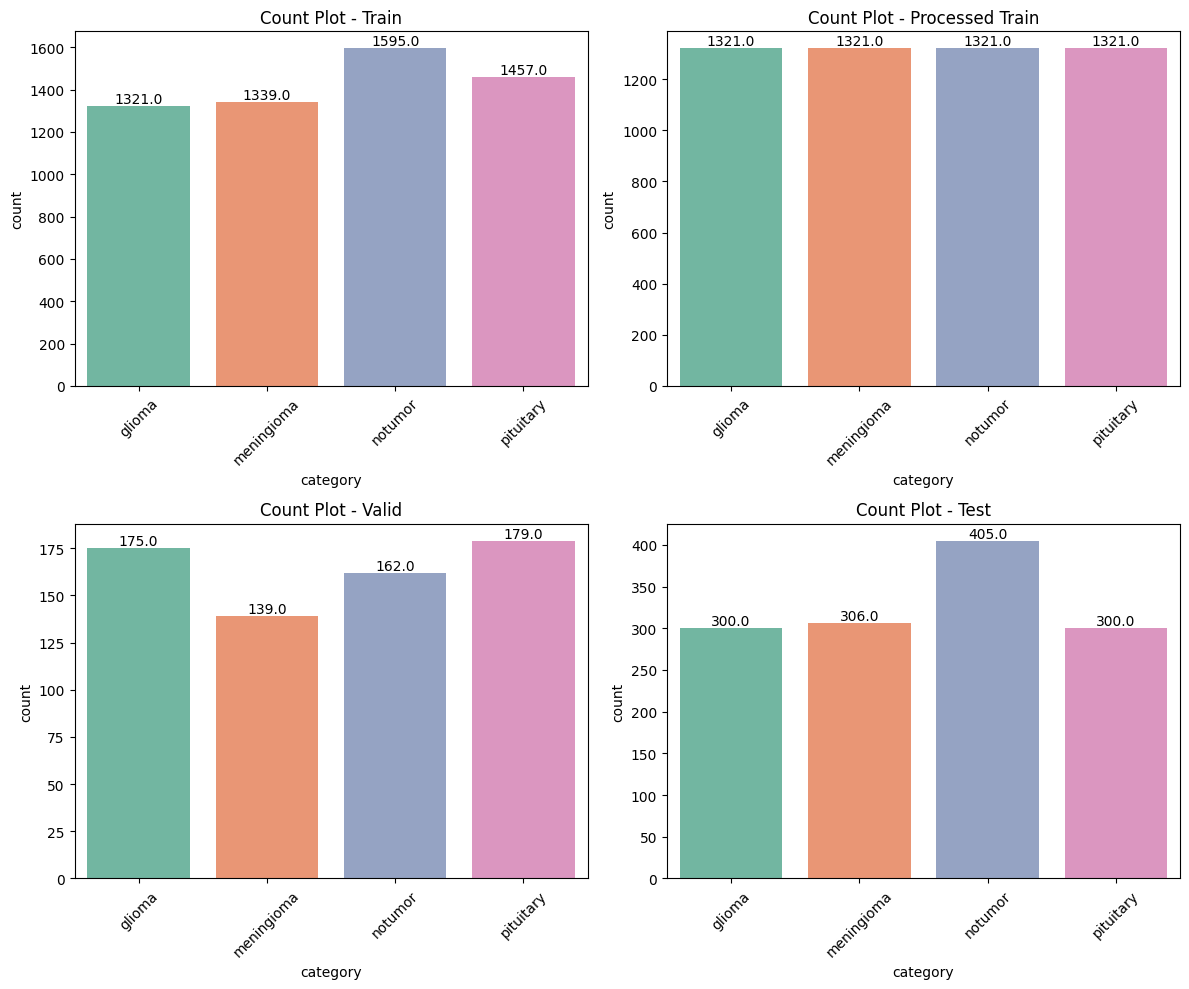

In [198]:

CATEGORIES =["glioma", "meningioma", "notumor", "pituitary"]
# Define a function to create subplots with count plots for different categories
def plot_countplots(train, processed_train, valid, test, categories):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 subplot layout

    datasets = [train, processed_train, valid, test]
    dataset_names = ['Train', 'Processed Train', 'Valid', 'Test']

    for i, ax in enumerate(axes.flatten()):
        sns.countplot(data=datasets[i], x='category', ax=ax, palette= "Set2")
        ax.set_title(f'Count Plot - {dataset_names[i]}')
        ax.set_xticklabels(categories, rotation=45)  # Set category names on x-axis
        
        # Add annotations (counts) on top of each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.tight_layout()  # Adjust layout for better presentation
    plt.show()

plot_countplots(trainset, training, validing, testing, CATEGORIES)


<h2> 🎃 Image Visualization</h2>


In [199]:
def read_img(filepath, size):
    img = image.load_img(filepath, target_size=size)
    img = image.img_to_array(img)
    return img


**📌About Code:**

`grid= ImageGrid(fig, 111, nrows_ncols=(4,4), axes_pad=0.05):` Creates a grid layout of subplots (4 rows, 4 columns) within the figure with padding between axes set to 0.05.

`for category_id, category in enumerate(CATEGORIES)::` Loops through each category in the list CATEGORIES using its index (category_id) and value (category).

`for filepath in training[training['category']== category]['file'].values[:NUM_OF_CATEGORIES]::` Loops through a subset of image file paths for the current category (limited by NUM_OF_CATEGORIES) in the training dataset.

`ax = grid[i]:` Gets the current subplot (ax) from the grid using the index i.

`img = read_img(filepath, (WIDTH,HEIGHT)):` Reads and loads the image using a function read_img() (not shown) with specified width and height.

`ax.imshow(img/255.0):` Displays the image on the current subplot (ax) after normalizing pixel values to the range [0,1].

`ax.axis('on'):` Turns on the axes for the subplot.

`if i%NUM_OF_CATEGORIES == NUM_OF_CATEGORIES - 1::` Checks if the current subplot is the last subplot in a row.

`ax.text(250, 112, filepath.split('/')[-2], verticalalignment ='center'):` Adds text to the subplot indicating the category label based on the filepath split.

`i+=1:` Increments the counter variable i to move to the next subplot in the grid.


<h3> ⛳Training Image Data </h3>

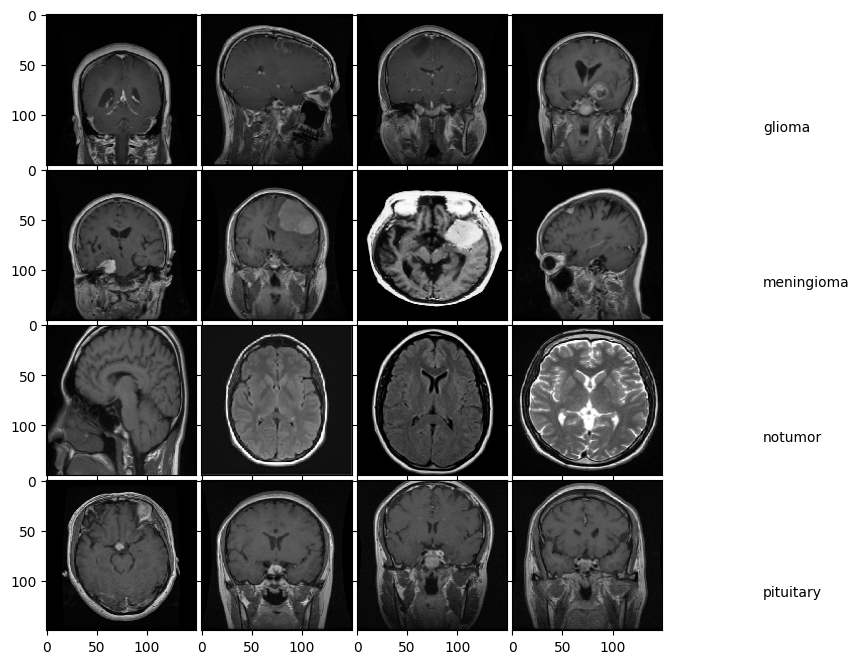

In [200]:

fig = plt.figure(1, figsize=(8, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)
i = 0

for category_id, category in enumerate(CATEGORIES):
    for filepath in training[training['category'] == category]['file'].values[:NUM_OF_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (WIDTH, HEIGHT))
        ax.imshow(img / 255.0)
        ax.axis('on')
        if i % NUM_OF_CATEGORIES == NUM_OF_CATEGORIES - 1:
            ax.text(250, 112, filepath.split('/')[-2], verticalalignment='center')
        i += 1

plt.show()

<h3> ⛳ Testing Image Data </h3>

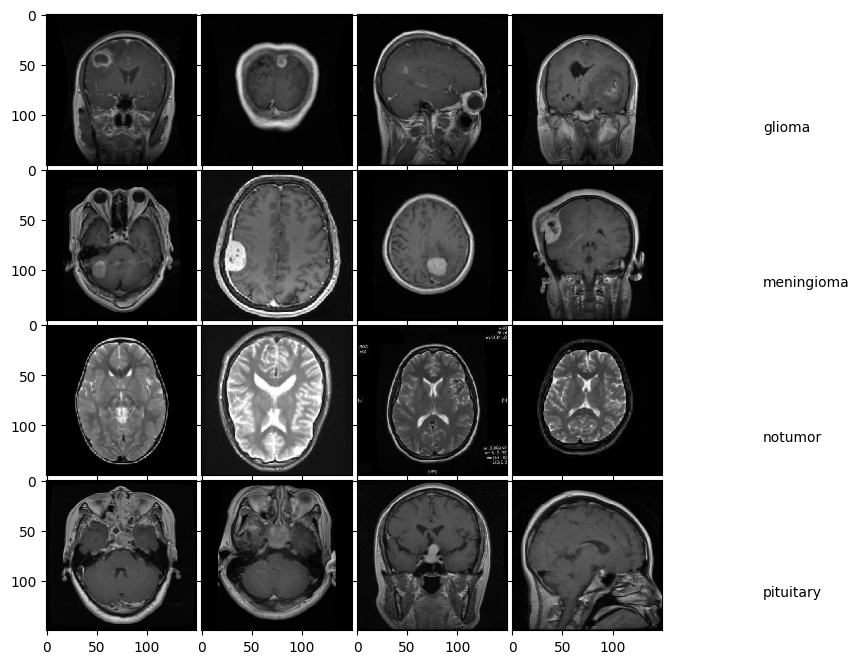

In [201]:
fig = plt.figure(1, figsize=(8,8))
#use of mpl ImageGrid toolkits for visualization
grid= ImageGrid(fig, 111, nrows_ncols=(4,4), axes_pad=0.05)
i=0
for category_id, category in enumerate(CATEGORIES):
    for filepath in testing[testing['category']== category]['file'].values[:NUM_OF_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (WIDTH,HEIGHT))
        ax.imshow(img/255.0)
        ax.axis('on')
        if i%NUM_OF_CATEGORIES == NUM_OF_CATEGORIES - 1:
            ax.text(250, 112, filepath.split('/')[-2], verticalalignment ='center')
        i+=1
    
plt.show() 

<h3> ⛳ Validating Image Data </h3>

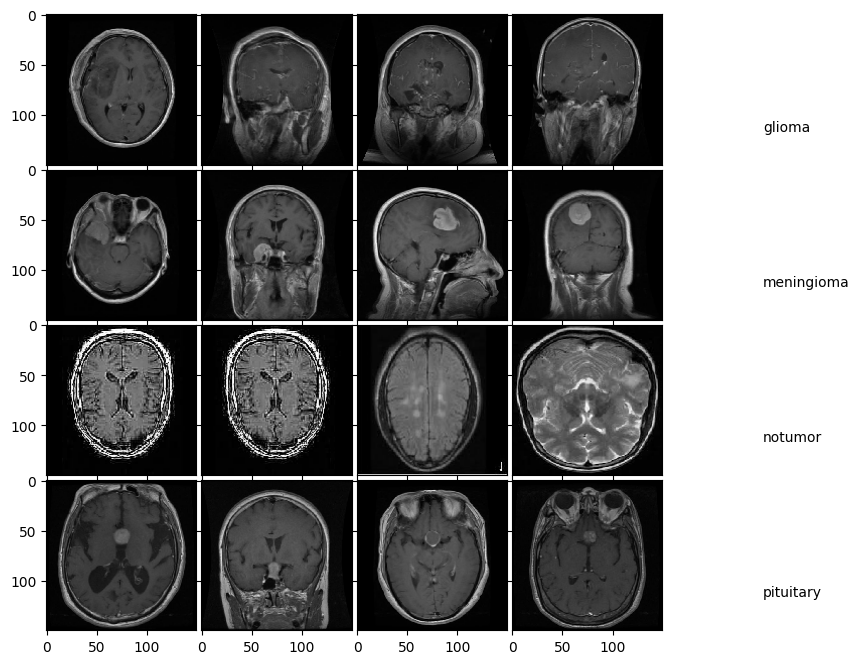

In [202]:
fig = plt.figure(1, figsize=(8,8))
#use of mpl ImageGrid toolkits for visualization
grid= ImageGrid(fig, 111, nrows_ncols=(4,4), axes_pad=0.05)
i=0
for category_id, category in enumerate(CATEGORIES):
    for filepath in validing[validing['category']== category]['file'].values[:NUM_OF_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (WIDTH,HEIGHT))
        ax.imshow(img/255.0)
        ax.axis('on')
        if i%NUM_OF_CATEGORIES == NUM_OF_CATEGORIES - 1:
            ax.text(250, 112, filepath.split('/')[-2], verticalalignment ='center')
        i+=1
    
plt.show() 

# 🏄 IMAGE DATA GENERATION FOR AUGMENTATION

**Image data augmentation** diversifies and expands **training datasets**, enhancing model performance by mitigating overfitting and improving generalization. By exposing models to various image alterations like **rotations, flips, and brightness changes**, it cultivates robustness to real-world scenarios. This technique helps balance class distributions and **trains models** to better handle diverse environmental factors, contributing to more reliable and effective predictions in **computer vision** tasks.

### 👾 Data Augmentation and Generation

In [203]:
def prepare_the_datasets(train_dataframe, valid_dataframe, x_columns, y_column, batch_size, image_size):  
    # Define parameters for ImageDataGenerator for train and validation
    train_image_data_generator = ImageDataGenerator(
        rescale=1./255,  # Rescale pixel values to [0,1]
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    val_image_data_generator = ImageDataGenerator(
        rescale=1./255  # Rescale pixel values to [0,1]
    )

    # Create image data generators for train and validation
    train_generator = train_image_data_generator.flow_from_dataframe(
        batch_size=batch_size,
        dataframe=train_dataframe,
        shuffle=True,
        x_col=x_columns,
        y_col=y_column,
        target_size=(image_size, image_size),  # Set the target size for images
        class_mode='categorical'  # For categorical labels
    )

    val_generator = val_image_data_generator.flow_from_dataframe(
        batch_size=batch_size,
        dataframe=valid_dataframe,
        shuffle=True,
        x_col=x_columns,
        y_col=y_column,
        target_size=(image_size, image_size),  # Set the target size for images
        class_mode='categorical'  # For categorical labels
    )
    return train_generator, val_generator

In [204]:
train_dataframe = training
valid_dataframe = testing
x_columns = 'file'
y_column = 'category'
batch_size = 64
image_size = 224

train_data_gen, validation_data_gen = prepare_the_datasets(train_dataframe, valid_dataframe, x_columns, y_column, batch_size, image_size)

Found 5284 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


# 😼 BUILD MODEL WITH InceptionV3

In [205]:
from tensorflow.keras.applications import MobileNetV2
Image_size=229,229,3
# pre_trained_model=keras.applications.InceptionV3(
#     include_top=False,
#     weights="imagenet",
#     input_shape=Image_size)
pre_trained_model= MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=Image_size)

**📌note:** 

1. Freezing the convolutional layers in a pre-trained model like InceptionV3 prevents them from being updated during training.
2. Freezing can restrict the model's ability to fine-tune lower layers, which might be beneficial for some tasks or datasets with similar features.

In [206]:
# Freeze the convolutional layers to prevent them from being trained
for layer in pre_trained_model.layers:
    layer.trainable = False

**📌note: Some Basic of Neural Network**

`Flatten:` Converts multidimensional data into a flat, 1D array for fully connected layers.

`Dense:` Fully connected layer where each neuron connects to every neuron in the previous layer.

`BatchNormalization:` Normalizes layer inputs, aiding faster training by reducing internal covariate shift.

`Dropout:` During training, randomly deactivates neurons to prevent overfitting.

`No Dropout in Output Layer:` Dropout is typically omitted in the output layer to avoid interference with final predictions.

`Dropout Range:` Typically, dropout rates range between 0.1 to 0.5, where 0.5 means dropping half the neurons during training. Optimal rates vary by dataset and architecture.

In [207]:
# x= pre_trained_model.output
# x= Flatten()(x)
# x = Dense(2048, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.4)(x)
# x = Dense(1024, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.4)(x)

x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)  # Hoặc sử dụng GlobalAveragePooling2D() thay vì Flatten() để giảm chiều
x = Dense(1280, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(640, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

output = Dense(4, activation='softmax')(x)


**📌note:** This code segment creates a classification model using MobileNetV2 by flattening the higher-dimensional output, adding fully connected layers with ReLU activation, applying batch normalization, and using dropout for regularization, ultimately generating a softmax output with 4 categories.

In [208]:
custom_model= Model(inputs=pre_trained_model.input, outputs= output)

**📌note:** This line constructs the final neural network model by specifying the input and output layers, creating an instance of the model with the defined architecture using the MobileNetV2 backbone.

# 🌱 MODEL SUMMARY

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 229, 229, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 115, 115, 32)         864       ['input_11[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 115, 115, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 115, 115, 32)         0         ['bn_Conv1[0][0]']     

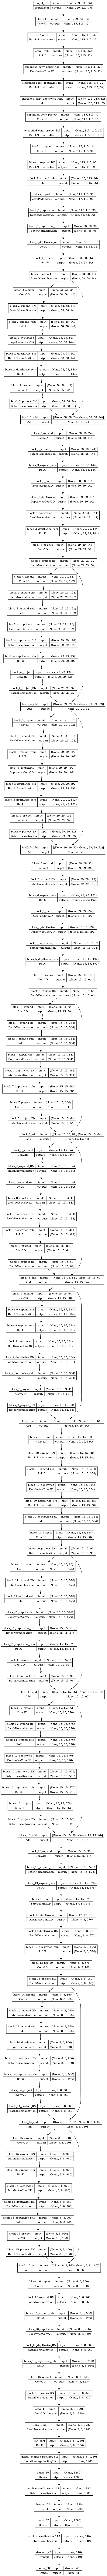

In [237]:
custom_model.summary()
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(custom_model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture image
Image(filename='model.png')

**📌note:** This information shows that the machine learning model has a total of about 147.8 million settings that it learns from the data. Among these, around 147.8 million settings are adjustable during training, taking up about 563.76 megabytes of space. The remaining 6,104 settings, taking up about 23.84 kilobytes, are fixed and not adjusted during training. 

# 🎯 PLOT MODEL

# 🐥 MODEL COMPILE, TENSORBOARD, CHECKPOINT, REDUCE_LR

`Model Compile:` Configuration of a model with loss functions, optimizers, and metrics to prepare it for training.

`TensorBoard:` Visualization tool used to analyze and monitor machine learning models' performance through interactive graphs and summaries.

`Checkpoint:` Saving mechanism that captures the model's weights, allowing resuming training or loading the model for later use.

`Reduce_LR:` Technique to dynamically decrease the learning rate during training to facilitate convergence and prevent overshooting of the optimal solution.

In [210]:
#Compile Model
custom_model.compile(loss='categorical_crossentropy',
               optimizer =tf.keras.optimizers.RMSprop(learning_rate=.0001),
               metrics=["accuracy"])

tensorboard= TensorBoard(log_dir="logs")
checkpoint= ModelCheckpoint("Custom_model_InceptionV3.h5",
                           monitor="val_loss",
                           mode="min",
                           save_best_only=True,
                           verbose=1)

early_stopping_callback= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0,
                                                         patience=4,
                                                         verbose=1,
                                                         restore_best_weights=True)

reduce_lr_callback= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                        factor=0.3,
                                                        patience=2,
                                                        verbose=1,
                                                        min_delta=0.00001)

CALLBACKS=[tensorboard, early_stopping_callback,checkpoint, reduce_lr_callback]

# 🌌 MODEL TRAINING

In [236]:
# Calculate steps per epoch and validation steps
#train_steps = len(train_data_gen) // batch_size
#validation_steps = len(validation_data_gen) // batch_size
nb_train_samples=5284 
nb_validation_samples= 1311
epochs= 24
batch_size= 64
history= custom_model.fit(train_data_gen,
                   steps_per_epoch= nb_train_samples//batch_size,
                   epochs= epochs,
                   callbacks=CALLBACKS,
                   validation_data= validation_data_gen,
                   validation_steps= nb_validation_samples//batch_size,
                   shuffle= True)



Epoch 1/24
82/82 [==============================] - ETA: 0s - loss: 0.2628 - accuracy: 0.9046
Epoch 1: val_loss improved from 0.44778 to 0.30586, saving model to Custom_model_InceptionV3.h5
82/82 [==============================] - 79s 932ms/step - loss: 0.2628 - accuracy: 0.9046 - val_loss: 0.3059 - val_accuracy: 0.9000 - lr: 3.0000e-05
Epoch 2/24
82/82 [==============================] - ETA: 0s - loss: 0.2687 - accuracy: 0.9036
Epoch 2: val_loss did not improve from 0.30586
82/82 [==============================] - 75s 909ms/step - loss: 0.2687 - accuracy: 0.9036 - val_loss: 0.3385 - val_accuracy: 0.8922 - lr: 3.0000e-05
Epoch 3/24
82/82 [==============================] - ETA: 0s - loss: 0.2495 - accuracy: 0.9115
Epoch 3: val_loss did not improve from 0.30586

Epoch 3: ReduceLROnPlateau reducing learning rate to 8.999999772640877e-06.
82/82 [==============================] - 76s 924ms/step - loss: 0.2495 - accuracy: 0.9115 - val_loss: 0.3176 - val_accuracy: 0.9008 - lr: 3.0000e-05
Epoc

# 👻 MODEL EVALUATION

In [212]:
train_score= custom_model.evaluate(train_data_gen)
print("\nWe have training loss {:.3f}% and training accuracy {:.3f}% after evaluation."
      .format(train_score[0]*100, train_score[1]*100))

83/83 [==============================] - 72s 867ms/step - loss: 0.2474 - accuracy: 0.9126

We have training loss 24.735% and training accuracy 91.257% after evaluation.


In [213]:
val_score= custom_model.evaluate(validation_data_gen)
print("\nWe have validation loss {:.3f}% and validation accuracy {:.3f}% after evaluation."
      .format(val_score[0]*100, val_score[1]*100))

21/21 [==============================] - 5s 232ms/step - loss: 0.4485 - accuracy: 0.8619

We have validation loss 44.845% and validation accuracy 86.194% after evaluation.


# 🍧 ACCURACY, LEARNING RATE AND LOSS PLOT

In [214]:
def accuracy_lr_loss_plot():
    fig = plt.figure(figsize=(15,6))
    
    plt.subplot(131)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'go--', label = "val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("No of Epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(132)
    plt.plot(history.history['lr'], 'bo--', label = 'learning Rate')
    plt.title("Learning Rate Measurements")
    plt.xlabel("No of Epochs")
    plt.ylabel("Learning Rate")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(133)
    plt.plot(history.history['loss'], 'bo--', label = 'loss')
    plt.plot(history.history['val_loss'], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurements")
    plt.xlabel("No of Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

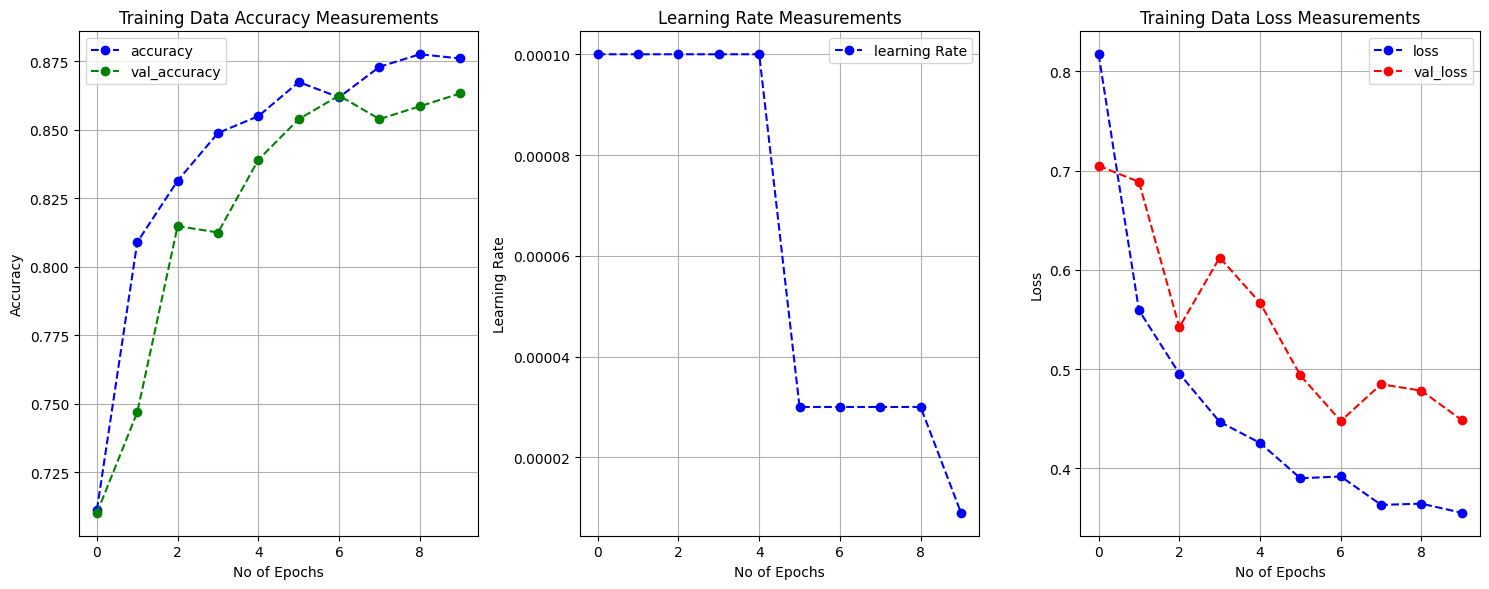

In [215]:
accuracy_lr_loss_plot()


# 😲 MODEL PREDICTION WITH TESTING (UNSEEN DATA)

In [239]:
def prepare_test_data(test_dataframe, x_columns, batch_size, image_size):  
    # Define parameters for ImageDataGenerator for train and validation

    test_image_data_generator = ImageDataGenerator(
        rescale=1./255  # Rescale pixel values to [0,1]
    )
    
    test_generator = test_image_data_generator.flow_from_dataframe(
        batch_size=batch_size,
        dataframe=test_dataframe,
        shuffle=False,
        x_col=x_columns,
        y_col=None,
        target_size=(image_size, image_size),  # Set the target size for images
        class_mode=None  # For categorical labels
    )
    return test_generator

In [240]:
#testing columns details
testing.columns

Index(['file', 'category_id', 'category'], dtype='object')

In [241]:
#test images preprocessing
test_processed_images = prepare_test_data(validing,'file', 32, 224)

Found 655 validated image filenames.


In [242]:
# Make predictions for images using the model
predictions = custom_model.predict(test_processed_images, steps=len(testing) // 32 + 1)

41/41 [==============================] - 3s 52ms/step


In [243]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 0, 1, 0, 1, 3, 1, 1, 1, 1, 1, 0,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 3, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3,

In [244]:
#validing dataset to create new dataframe
target_and_predict = validing.copy()

In [245]:
#add column for predicted value
target_and_predict['predicted_classes'] = predicted_classes

In [246]:
#target_and_predict dataframe
target_and_predict

file  category_id  \
0    /kaggle/input/mri-image-based-brain-tumor-clas...            0   
1    /kaggle/input/mri-image-based-brain-tumor-clas...            0   
2    /kaggle/input/mri-image-based-brain-tumor-clas...            0   
3    /kaggle/input/mri-image-based-brain-tumor-clas...            0   
4    /kaggle/input/mri-image-based-brain-tumor-clas...            0   
..                                                 ...          ...   
650  /kaggle/input/mri-image-based-brain-tumor-clas...            3   
651  /kaggle/input/mri-image-based-brain-tumor-clas...            3   
652  /kaggle/input/mri-image-based-brain-tumor-clas...            3   
653  /kaggle/input/mri-image-based-brain-tumor-clas...            3   
654  /kaggle/input/mri-image-based-brain-tumor-clas...            3   

      category  predicted_classes  
0       glioma                  0  
1       glioma                  0  
2       glioma                  0  
3       glioma                  0  
4       glioma                  0  
..         ...                ...  
650  pituitary                  3  
651  pituitary                  3  
652  pituitary                  3  
653  pituitary                  3  
654  pituitary                  3  

[655 rows x 4 columns]

# Image test

1/1 [==============================] - 0s 24ms/step
[[9.9191171e-01 5.8541740e-03 7.8517455e-04 1.4489178e-03]]
Predicted Class: glioma, Probability: 0.99


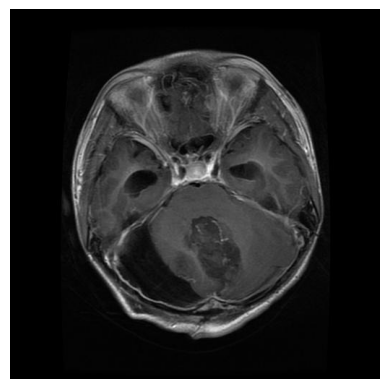

In [247]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the custom model (Assuming it's already loaded, this line is just a placeholder)
# custom_model = load_model('path_to_your_model.h5')

# Define the categories
CATEGORIES = ["glioma", "meningioma", "notumor", "pituitary"]

# Path to the image
image_path = '/kaggle/input/mri-image-based-brain-tumor-classification/MRI Image Dataset for Brain Tumor/Testing/glioma/Te-glTr_0000.jpg'

# Read and preprocess the image
img = image.load_img(image_path, target_size=(229, 229))  # Adjust the size according to the model's requirement
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Create a batch of size 1
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Predict using the model
predictions = custom_model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_class_name = CATEGORIES[predicted_class_index]
predicted_probability = np.max(predictions)

# Print predictions
print(predictions)
print(f'Predicted Class: {predicted_class_name}, Probability: {predicted_probability:.2f}')

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

# 😃 TESTING ACCURACY

In [248]:
# Calculate accuracy
accuracy = accuracy_score(target_and_predict['category_id'], target_and_predict['predicted_classes'])

print(f"\nWe have test accuracy {accuracy * 100:.4f}% after test images evaluation.")

# Calculate f1_score
from sklearn.metrics import f1_score
f1_train = f1_score(y_true_train, y_pred_train, average='weighted')
print("Training F1 score: {:.3f}".format(f1_train))


We have test accuracy 92.6718% after test images evaluation.
Training F1 score: 0.251


# 😖 CONFUSION MATRIX DISPLAY


This code snippet achieves the following:

* Mapping Creation: Constructs a dictionary mapping category IDs to their corresponding names from the DataFrame.
* Replacement: Converts numeric values in 'category_id' and 'predicted_classes' columns to their respective names using the mapping dictionary.
* Report Generation: Utilizes the modified DataFrame to generate a classification report, replacing numeric values with category names, demonstrating the classification performance.

In [249]:
# Replace these with your actual column names
category_id_column = 'category_id'
predicted_classes_column = 'predicted_classes'
category_name_column = 'category'

# Create a mapping dictionary from category_id to category_name
id_to_name_mapping = dict(zip(target_and_predict[category_id_column], target_and_predict[category_name_column]))
print(f"id_to_name_mapping:\n{id_to_name_mapping}")
# Replace numeric values in 'category_id' and 'predicted_classes' columns with their names
target_and_predict['category_id'] = target_and_predict['category_id'].map(id_to_name_mapping)
target_and_predict['predicted_classes'] = target_and_predict['predicted_classes'].map(id_to_name_mapping)

# Generate classification report with names instead of numeric values
report = classification_report(
    target_and_predict['category_id'],
    target_and_predict['predicted_classes']
)

print(report)

id_to_name_mapping:
{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}
              precision    recall  f1-score   support

      glioma       0.97      0.98      0.97       175
  meningioma       0.95      0.73      0.83       139
     notumor       0.98      0.97      0.98       162
   pituitary       0.84      0.99      0.91       179

    accuracy                           0.93       655
   macro avg       0.93      0.92      0.92       655
weighted avg       0.93      0.93      0.92       655



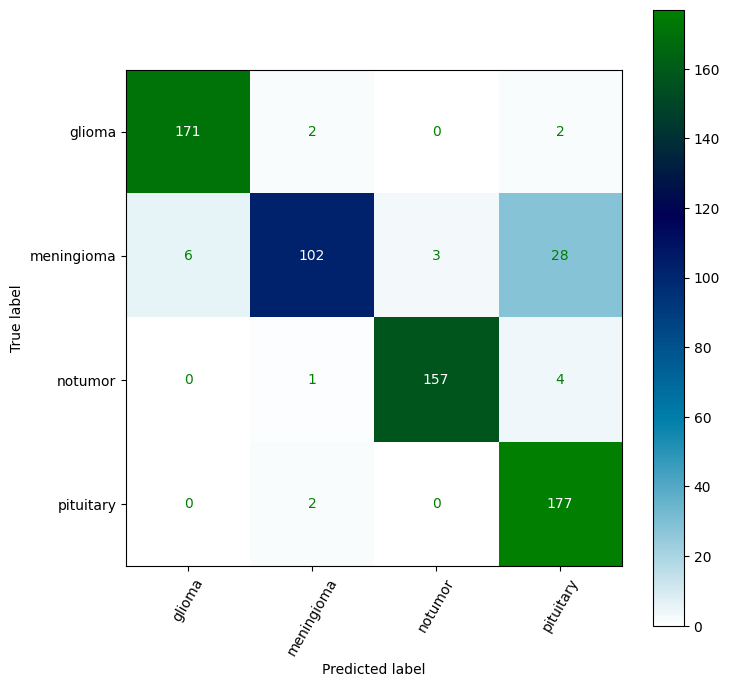

In [250]:
# Generate confusion matrix
conf_matrix = confusion_matrix(
    target_and_predict['category_id'],
    target_and_predict['predicted_classes']
)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(id_to_name_mapping.values()))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='ocean_r',ax=ax,xticks_rotation=60)
plt.show()


     Category   TP  FP  FN   TN  Precision  Sensitivity (Recall)  Specificity  \
0      glioma  171   6   4  474       0.97                  0.98         0.99   
1  meningioma  102   5  37  511       0.95                  0.73         0.99   
2     notumor  157   3   5  490       0.98                  0.97         0.99   
3   pituitary  177  34   2  442       0.84                  0.99         0.93   

   Accuracy  
0      0.98  
1      0.94  
2      0.99  
3      0.95  


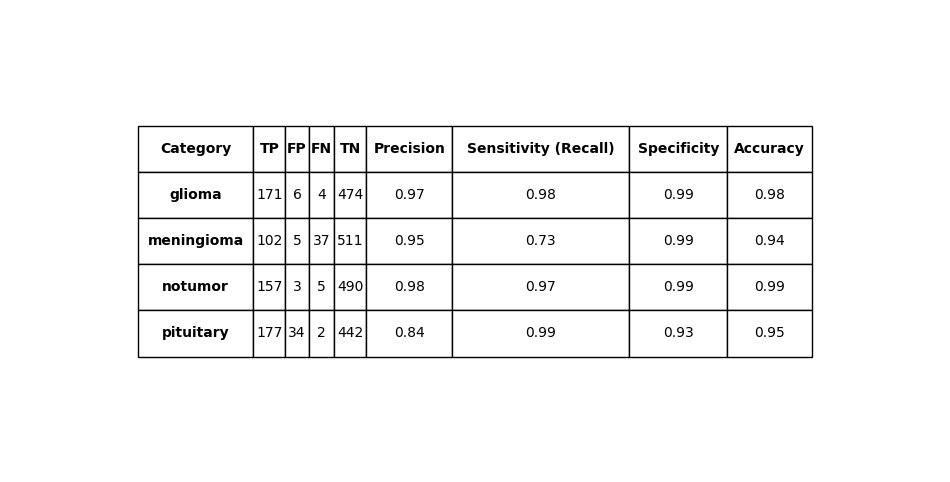

In [251]:
# Calculate and print Precision, Sensitivity, Specificity, and Accuracy for each class
categories = list(id_to_name_mapping.values())
conf_matrix = np.array(conf_matrix)


results = []
for i, category in enumerate(categories):
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)
    
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    sensitivity = TP / (TP + FN) if TP + FN != 0 else 0
    specificity = TN / (TN + FP) if TN + FP != 0 else 0
    accuracy = (TP + TN) / conf_matrix.sum() if conf_matrix.sum() != 0 else 0
    
#     print(f"Category: {category}")
#     print(f"  Precision: {precision:.3f}")
#     print(f"  Sensitivity (Recall): {sensitivity:.3f}")
#     print(f"  Specificity: {specificity:.3f}")
#     print(f"  Accuracy: {accuracy:.3f}")
#     print("TP: {}, FP: {}, FN: {}, TN: {}".format(TP, FP, FN, TN))
#     print()
 
    results.append({
        'Category': category,
        'TP': TP,
        'FP': FP,
        'FN': FN,
        'TN': TN,
        'Precision': round(precision, 2),
        'Sensitivity (Recall)': round(sensitivity, 2),
        'Specificity': round(specificity, 2),
        'Accuracy': round(accuracy, 2)
    })
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


# Plot the table using matplotlib
fig, ax = plt.subplots(figsize=(12, len(categories) + 2))
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')

# Format header
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(fontweight='bold')
    if key[1] == 0:
        cell.set_text_props(fontweight='bold')
    cell.set_height(0.1)  # Increase row height

# Adjust font size and column width
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

plt.show()

# 👿 MISCLASSIFIED IMAGES 

The provided code snippet performs the following:

* Data Selection: Extracts misclassified samples by comparing the 'category_id' and 'predicted_classes' columns.
* Visualization: Displays a grid of misclassified images along with their actual and predicted labels.
* Adjustable Display: Sets the number of misclassified images to exhibit in a 3x3 grid and showcases them with their respective labels using Matplotlib.

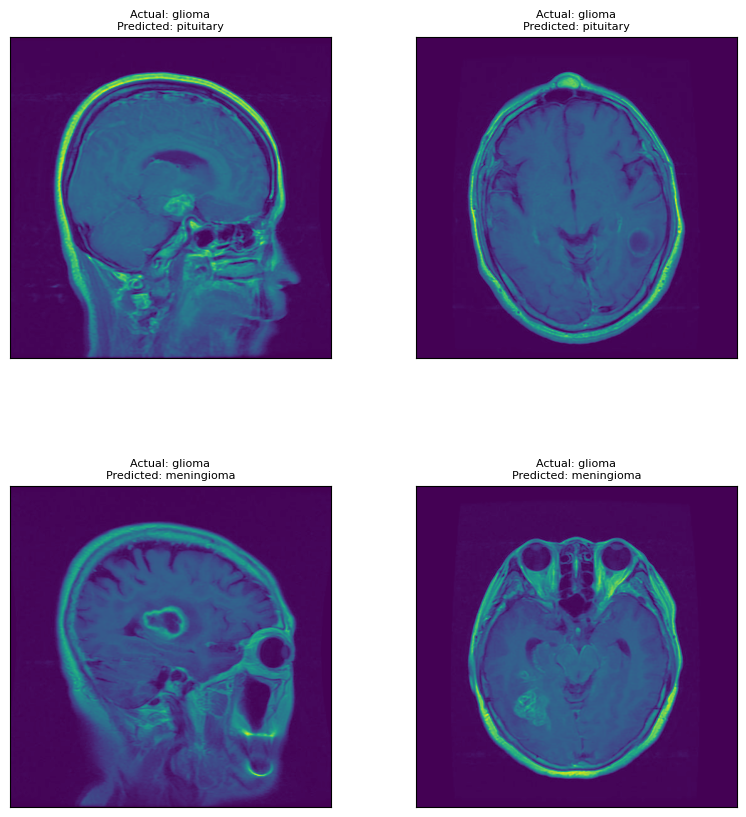

In [252]:


import matplotlib.pyplot as plt
from matplotlib import gridspec
from PIL import Image

# Assuming 'target_and_predict' is your DataFrame
# and it has been defined somewhere above this code.

# Replace these with your actual column names
image_path_column = 'file'
category_id_column = 'category_id'
predicted_classes_column = 'predicted_classes'

# Filter misclassified samples from the DataFrame
misclassified = target_and_predict[target_and_predict[category_id_column] != target_and_predict[predicted_classes_column]]

# Define the number of images to display
num_images_to_display = 4  # Adjust based on your need or available space

# Adjust the number of images to display based on the actual number of misclassified images
num_images_to_display = min(len(misclassified), num_images_to_display)

# Create a GridSpec with appropriate dimensions
cols = 2  # You can adjust the number of columns based on your display preference
rows = (num_images_to_display + cols - 1) // cols  # Calculate rows needed

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(rows, cols)
gs.update(wspace=0.1, hspace=0.4)

for i, (_, row) in enumerate(misclassified.head(num_images_to_display).iterrows()):
    img_path = row[image_path_column]
    actual_label = row[category_id_column]
    predicted_label = row[predicted_classes_column]

    img = Image.open(img_path)
    ax = plt.subplot(gs[i])
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Actual: {actual_label}\nPredicted: {predicted_label}', fontsize=8)

plt.tight_layout()
plt.show()

# 👽 MISCLASSIFIED IMAGE PATH


The provided code performs the following operations:

* Data Selection: Filters misclassified samples by comparing 'category_id' and 'predicted_classes' columns.
* Extraction: Retrieves a DataFrame containing misclassified samples with columns for image paths, actual categories, and predicted categories.
* Display: Prints a DataFrame displaying misclassified samples along with their respective image paths, actual categories, and predicted categories.

In [253]:
# Replace these with your actual column names
image_path_column = 'file'
category_id_column = 'category_id'
predicted_classes_column = 'predicted_classes'

# Filter misclassified samples and extract indices with corresponding image paths
misclassified_samples = target_and_predict[target_and_predict[category_id_column] != target_and_predict[predicted_classes_column]]
misclassified_indices_with_image_paths = misclassified_samples[[image_path_column, category_id_column, predicted_classes_column]]

print("Misclassified Samples with Image Paths:")
misclassified_indices_with_image_paths

Misclassified Samples with Image Paths:


file category_id  \
53   /kaggle/input/mri-image-based-brain-tumor-clas...      glioma   
117  /kaggle/input/mri-image-based-brain-tumor-clas...      glioma   
140  /kaggle/input/mri-image-based-brain-tumor-clas...      glioma   
148  /kaggle/input/mri-image-based-brain-tumor-clas...      glioma   
175  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
181  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
186  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
187  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
189  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
191  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
197  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
199  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
210  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
211  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
213  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
218  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
222  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
226  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
227  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
229  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
238  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
240  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
242  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
249  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
250  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
252  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
268  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
277  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
280  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
282  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
287  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
288  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
293  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
295  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
296  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
298  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
300  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
303  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
304  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
311  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
312  /kaggle/input/mri-image-based-brain-tumor-clas...  meningioma   
372  /kaggle/input/mri-image-based-brain-tumor-clas...     notumor   
377  /kaggle/input/mri-image-based-brain-tumor-clas...     notumor   
395  /kaggle/input/mri-image-based-brain-tumor-clas...     notumor   
398  /kaggle/input/mri-image-based-brain-tumor-clas...     notumor   
445  /kaggle/input/mri-image-based-brain-tumor-clas...     notumor   
546  /kaggle/input/mri-image-based-brain-tumor-clas...   pituitary   
606  /kaggle/input/mri-image-based-brain-tumor-clas...   pituitary   

    predicted_classes  
53          pituitary  
117         pituitary  
140        meningioma  
148        meningioma  
175         pituitary  
181         pituitary  
186         pituitary  
187            glioma  
189            glioma  
191         pituitary  
197            glioma  
199         pituitary  
210           notumor  
211         pituitary  
213         pituitary  
218         pituitary  
222         pituitary  
226         pituitary  
227         pituitary  
229            glioma  
238         pituitary  
240         pituitary  
242         pituitary  
249         pituitary  
250            glio

# Load Model

In [254]:
import pickle

# Save history using pickle
with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [255]:
import pickle

# Load history using pickle
with open('/kaggle/input/history/history.pkl', 'rb') as file:
    history.history = pickle.load(file)

In [256]:
from tensorflow.keras.models import load_model

# Đường dẫn đến mô hình đã lưu
model_path = '/kaggle/input/mobilenetv2-24/Custom_model_MobileNetV2_24.h5'

# Tải mô hình
custom_model = load_model(model_path)

# Hiển thị kiến trúc của mô hình để xác minh
custom_model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 229, 229, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 115, 115, 32)         864       ['input_11[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 115, 115, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 115, 115, 32)         0         ['bn_Conv1[0][0]']     

# Conclusion
**Please feel free to ask in the comment section if you have any confusion or questions.**

**Here are some of the contributions I've made on Kaggle:**
1. [Pie Charts in Python](https://www.kaggle.com/code/alsaniipe/pie-charts-in-python)
1. [Scatter plots with Plotly Express](https://www.kaggle.com/code/alsaniipe/scatter-plots-with-plotly-express)
1. [X-ray Image Classification using Transfer Learning](https://www.kaggle.com/code/alsaniipe/x-ray-image-classification-using-transfer-learning)
1. [Flowers Classification by Using VGG16 Model 🎉🎉](https://www.kaggle.com/code/alsaniipe/flowers-classification-by-using-vgg16-model)
1. [Car Brand Prediction's by Using ResNet50 Model](https://www.kaggle.com/code/alsaniipe/car-brand-prediction-s-by-using-resnet50-model)
1. [Image Preprocessing-Morpological Analysis & Kernel](https://www.kaggle.com/code/alsaniipe/image-preprocessing-morpological-analysis-kernel)
1. [Image Similarity Index (SSIM analysis )](https://www.kaggle.com/code/alsaniipe/image-similarity-index-ssim-analysis)
1. [Image Preprocessing- Image Transformation & OpenCV](https://www.kaggle.com/code/alsaniipe/image-preprocessing-image-transformation-opencv)